**复习**:这门课程得主要目的是通过真实的数据，以实战的方式了解数据分析的流程和熟悉数据分析python的基本操作。知道了课程的目的之后，我们接下来我们要正式的开始数据分析的实战教学，完成kaggle上[泰坦尼克的任务](https://www.kaggle.com/c/titanic/overview)，实战数据分析全流程。
这里有两份资料：
教材《Python for Data Analysis》和 baidu.com &
google.com（善用搜索引擎）

## 1 第一章：数据载入及初步观察

### 1.1 载入数据
数据集下载 https://www.kaggle.com/c/titanic/overview

#### 1.1.1 任务一：导入numpy和pandas

In [1]:
#写入代码
import numpy as np
import pandas as pd

【提示】如果加载失败，学会如何在你的python环境下安装numpy和pandas这两个库

#### 1.1.2 任务二：载入数据
(1) 使用相对路径载入数据  
(2) 使用绝对路径载入数据

In [2]:
#根据相对路径载入数据，这里我是放在了和该ipynb文件同一个文件夹下的data里
data = pd.read_csv("data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#观察以下data的数据类型
type(data)

pandas.core.frame.DataFrame

DataFrame是一种表格型数据结构，它含有一组有序的列，每列可以是不同的值。
关于dataframe的一些基本操作：https://www.jianshu.com/p/8024ceef4fe2

【提示】相对路径载入报错时，尝试使用os.getcwd()查看当前工作目录。  
【思考】知道数据加载的方法后，试试pd.read_csv()和pd.read_table()的不同，如果想让他们效果一样，需要怎么做？了解一下'.tsv'和'.csv'的不同，如何加载这两个数据集？  
【总结】加载的数据是所有工作的第一步，我们的工作会接触到不同的数据格式（eg:.csv;.tsv;.xlsx）,但是加载的方法和思路都是一样的，在以后工作和做项目的过程中，遇到之前没有碰到的问题，要多多查资料吗，使用googel，了解业务逻辑，明白输入和输出是什么。

【答】read_csv() 读取以‘，’分割的文件到DataFrame；read_table()读取以‘/t’分割的文件到DataFrame

#### 1.1.3 任务三：每1000行为一个数据模块，逐块读取

In [8]:
#写入代码
chunker = pd.read_csv('train.csv', chunksize=1000)

In [9]:
type(chunker)

pandas.io.parsers.TextFileReader

【思考】什么是逐块读取？为什么要逐块读取呢？

【提示】大家可以chunker(数据块)是什么类型？用`for`循环打印出来出处具体的样子是什么？

【答】答：当需要导入一个比较大的文件时，进行分块处理可以节约空间和时间。在计算时，有时不需要计算所有的块，只需要计算某个块即可。

chunker的类型是TextFileReader。

In [10]:
for i in chunker:
    print(i)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

#### 1.1.4 任务四：将表头改成中文，索引改为乘客ID [对于某些英文资料，我们可以通过翻译来更直观的熟悉我们的数据]
PassengerId => 乘客ID  
Survived    => 是否幸存   
Pclass      => 乘客等级(1/2/3等舱位)  
Name        => 乘客姓名  
Sex         => 性别                 
Age         => 年龄                 
SibSp       => 堂兄弟/妹个数  
Parch       => 父母与小孩个数  
Ticket      => 船票信息             
Fare        => 票价                
Cabin       => 客舱                
Embarked    => 登船港口             

In [13]:
#写入代码
df = pd.read_csv('train.csv',names=['乘客ID','是否幸存','仓位等级','姓名','性别','年龄','兄弟姐妹个数','父母子女个数','船票信息','票价','客舱','登船港口'],index_col='乘客ID',header=0)
df.head(5)

,是否幸存,仓位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口
乘客ID,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


【思考】所谓将表头改为中文其中一个思路是：将英文列名表头替换成中文。还有其他的方法吗？

【答】不知道

### 1.2 初步观察
导入数据后，你可能要对数据的整体结构和样例进行概览，比如说，数据大小、有多少列，各列都是什么格式的，是否包含null等

#### 1.2.1 任务一：查看数据的基本信息

In [14]:
#这里的df是我们上一步读取后，替换掉表头的df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   是否幸存    891 non-null    int64  
 1   仓位等级    891 non-null    int64  
 2   姓名      891 non-null    object 
 3   性别      891 non-null    object 
 4   年龄      714 non-null    float64
 5   兄弟姐妹个数  891 non-null    int64  
 6   父母子女个数  891 non-null    int64  
 7   船票信息    891 non-null    object 
 8   票价      891 non-null    float64
 9   客舱      204 non-null    object 
 10  登船港口    889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


【提示】有多个函数可以这样做，你可以做一下总结

#### 1.2.2 任务二：观察表格前10行的数据和后15行的数据

In [15]:
df.head(10)

,是否幸存,仓位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口
乘客ID,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [16]:
df.tail(15)

,是否幸存,仓位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口
乘客ID,,,,,,,,,,,
877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


#### 1.2.4 任务三：判断数据是否为空，为空的地方返回True，其余地方返回False

In [20]:
df.isnull().head()

,是否幸存,仓位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口
乘客ID,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False


In [19]:
#查看每个属性的缺失值数量
df.isnull().sum()

是否幸存        0
仓位等级        0
姓名          0
性别          0
年龄        177
兄弟姐妹个数      0
父母子女个数      0
船票信息        0
票价          0
客舱        687
登船港口        2
dtype: int64

【总结】上面的操作都是数据分析中对于数据本身的观察

【思考】对于一个数据，还可以从哪些方面来观察？找找答案，这个将对下面的数据分析有很大的帮助

【答】还可以观察缺失值和异常值，缺失值很好理解，即表格中为空或Nan的值。异常值有时需要根据经验来判断，比如离群点，比如年龄大于150岁等等。

### 1.3 保存数据

#### 1.3.1 任务一：将你加载并做出改变的数据，在工作目录下保存为一个新文件train_chinese.csv

In [21]:
#写入代码
# 注意：不同的操作系统保存下来可能会有乱码。大家可以加入`encoding='GBK' 或者 ’encoding = ’utf-8‘‘`
df.to_csv('data/train_changed.csv')

【总结】数据的加载以及入门，接下来就要接触数据本身的运算，我们将主要掌握numpy和pandas在工作和项目场景的运用。

数据已经存到了data文件夹下

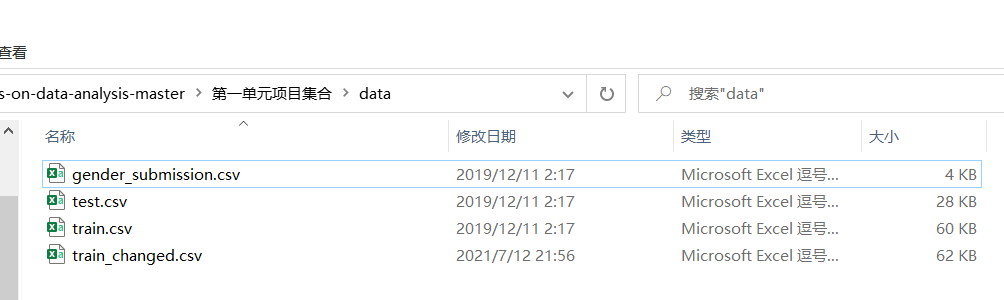